Using parallel gradient descent
Examples per thread: 35
Thread 0 spawned
Thread 1 spawned
Thread 2 spawnedThread 0 finished
Thread 1 finished

Thread 3 spawned
Thread 3 finished
Thread 2 finished
Finished in 0:00:00.004939

Computed margins and decision boudary for training set:


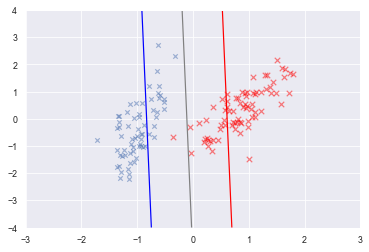

Using parallel gradient descent
Examples per thread: 35
Thread 0 spawned
Thread 1 spawned
Thread 0 finished
Thread 1 finishedThread 2 spawned

Thread 2 finished
Thread 3 spawned
Thread 3 finished
Finished in 0:00:00.005356

Computed margins and decision boudary for training set:


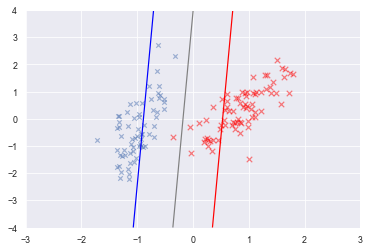

In [15]:
## Dataset tiny
import matplotlib.pyplot as plt
from DataLoader import *
from LinearSVM import LinearSVM
from SGD import *

dataloader = DataLoader()

# Tiny
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()
lr = 0.1
C = 0.001
svm = LinearSVM(learning_rate=lr, regularization=C, show_plot=True, thread_count=4)
svm.fit(xtrain, ytrain)

Finished in 0:00:00.033509

Computed margins and decision boudary for training set:


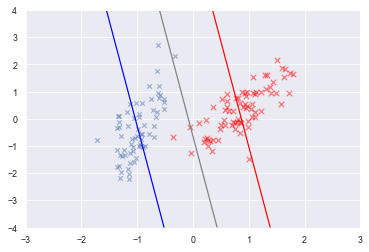

Finished in 0:00:00.038783

Computed margins and decision boudary for training set:


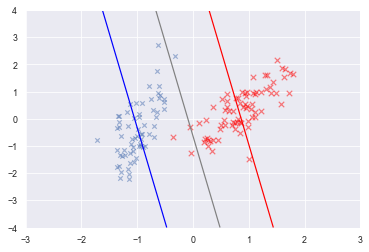

In [16]:
svm = LinearSVM(learning_rate=lr, regularization=C, show_plot=True, thread_count=1)
svm.fit(xtrain, ytrain)

In [17]:
# Large
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()

In [18]:
svm = LinearSVM(learning_rate=lr, regularization=C, show_plot=False, thread_count=8)
svm.fit(xtrain, ytrain)

Thread 5 finished
Thread 3 finishedThread 4 finished
Thread 0 finished

Thread 7 finished
Thread 1 finished
Thread 6 finishedThread 2 finished

Finished in 0:00:01.898866


Using parallel gradient descent
Examples per thread: 17500
Thread 0 spawned
Thread 1 spawned
Thread 2 spawned
Thread 3 spawned
Thread 4 spawned
Thread 5 spawned
Thread 6 spawned
Thread 7 spawned
Thread 6 finished
Thread 2 finished
Thread 0 finished
Thread 5 finishedThread 1 finished

Thread 3 finished
Thread 4 finished
Thread 7 finished
Finished in 0:00:01.877201


Using parallel gradient descent
Examples per thread: 17500
Thread 0 spawned
Thread 1 spawnedThread 2 spawned
Thread 3 spawned

Thread 4 spawned
Thread 5 spawned
Thread 6 spawned
Thread 7 spawned
Thread 3 finished
Thread 2 finished
Thread 7 finishedThread 0 finished

Thread 1 finished
Thread 6 finished
Thread 4 finished
Thread 5 finished
Finished in 0:00:01.868195


In [19]:
svm = LinearSVM(learning_rate=lr, regularization=C, show_plot=False, thread_count=4)
svm.fit(xtrain, ytrain)

Using parallel gradient descent
Examples per thread: 35000
Thread 0 spawned
Thread 1 spawned
Thread 2 spawned
Thread 3 spawned
Thread 3 finished
Thread 2 finished
Thread 0 finishedThread 1 finished

Finished in 0:00:01.734923


Using parallel gradient descent
Examples per thread: 35000
Thread 0 spawned
Thread 1 spawned
Thread 2 spawned
Thread 3 spawned
Thread 3 finished
Thread 2 finished
Thread 1 finished
Thread 0 finished
Finished in 0:00:01.868777


Using parallel gradient descent
Examples per thread: 35000
Thread 0 spawned
Thread 1 spawned
Thread 2 spawned
Thread 3 spawned
Thread 1 finished
Thread 2 finished
Thread 3 finished
Thread 0 finished
Finished in 0:00:01.810679


In [20]:
svm = LinearSVM(learning_rate=lr, regularization=C, show_plot=False, thread_count=2)
svm.fit(xtrain, ytrain)

Using parallel gradient descent
Examples per thread: 70000
Thread 0 spawned
Thread 1 spawned
Thread 0 finished
Thread 1 finished
Finished in 0:00:01.806563


Using parallel gradient descent
Examples per thread: 70000
Thread 0 spawned
Thread 1 spawned
Thread 0 finished
Thread 1 finished
Finished in 0:00:01.848691


Using parallel gradient descent
Examples per thread: 70000
Thread 0 spawned
Thread 1 spawned
Thread 1 finished
Thread 0 finished
Finished in 0:00:01.817725


In [21]:
svm = LinearSVM(learning_rate=lr, regularization=C, show_plot=False, thread_count=1)
svm.fit(xtrain, ytrain)

Finished in 0:00:19.163818


Finished in 0:00:19.447150


Finished in 0:00:20.085733
